# Visualising the internals of a neural network

## 1. Introduction
Welcome to this interactive Jupyter notebook which is a companion to our blog post "Visualising the Internals of a Neural Network". In this notebook, we will dive into the intricacies of neural networks and use the PyTorch library in Python to visualise the inner workings of these sophisticated machine learning models.

As we proceed, we will demystify concepts such as layers, weights, biases, activation functions, and more, by not just discussing them, but also providing interactive code snippets. By the end of this notebook, we hope to provide you with a hands-on understanding of neural networks and give you insights that are not apparent from the model's final output.

Please note, to fully engage with this notebook, it is recommended to have a basic understanding of Python programming, and some familiarity with machine learning concepts and PyTorch would be advantageous. However, we will attempt to make this resource as beginner-friendly as possible.

## 2. Setup and Import Libraries
Before we start exploring the internals of a neural network, we need to make sure we have all the necessary libraries installed and imported. This notebook primarily relies on PyTorch, a popular open-source machine learning library for Python. If you do not have PyTorch installed already, please uncomment and run the first cell.


In [31]:
# To install PyTorch, uncomment and run the below line
# !pip install torch torchvision

Apart from PyTorch, we will use other standard Python libraries such as NumPy and Matplotlib for numerical operations and data visualisation, respectively. Let's import these:

In [32]:
# Import necessary libraries
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np

# Let's check the version of PyTorch
print(f"PyTorch Version: {torch.__version__}")

# Verify if CUDA is available and if not, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

PyTorch Version: 2.0.1+cpu
Device: cpu


By running the above code, we import the necessary libraries and check the version of PyTorch. We also set the device to CUDA if it's available. CUDA is a parallel computing platform by NVIDIA, and using it can substantially speed up computation time. If CUDA isn't available, we'll use the CPU for computations.

Remember, throughout this notebook, we'll assume that the device is set as defined above. If you're running this on your local machine and it doesn't have a GPU (or the GPU isn't set up for CUDA), computations might be slower.

In the next section, we will dig deeper into the basics of neural networks. Stay tuned!

## 3. Basics of Neural Networks
A neural network is a computational model inspired by the way biological brains process information. These models are used in machine learning and artificial intelligence to solve complex problems that require the machine to 'learn' from data.

Neural networks are made up of layers of interconnected nodes or 'neurons'. Each neuron receives input from some neurons in the previous layer, performs a computation, and passes the output to neurons in the next layer. The input layer of the network takes in raw data, each hidden layer performs computations, and the output layer produces the final result.

Here are some key concepts:

**Neurons**: The fundamental unit of a neural network. A neuron takes inputs, performs a computation on them, and produces an output. Each neuron is associated with a weight and a bias.

**Weights and Biases**: Weights control the strength of the connection between two neurons. Biases allow you to shift the activation function curve up or down.

**Activation Functions**: These are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated based on the weighted sum of its input.

**Layers**: A neural network is typically organized into layers. Layers are made up of multiple neurons. There are three types of layers: input layer, hidden layer(s), and output layer.

We'll dig deeper into these concepts in the following sections and visualise them with PyTorch. The goal is to build an intuitive understanding of how neural networks learn from data, how they self-update, and how the different components interact with each other.

In the next section, we will begin our exploration by setting up our environment and importing the necessary Python libraries.

## 4. Understanding and Visualising Layers in a Neural Network
In a neural network, layers play a critical role in transforming input data into the output. The layers are interconnected through their nodes or neurons, where the transformation of data happens based on the weights and bias.

There are three types of layers in a neural network:

**Input Layer**: This is the very first layer where each neuron corresponds to one feature of the input data. The input layer simply passes the input it receives to the next layer, often called the first hidden layer.

**Hidden Layer(s)**: These are the layers after the input layer and before the output layer. The hidden layers are responsible for learning and representing various levels of abstractions of the input data.

**Output Layer**: This is the final layer in a neural network. It provides the output of the model in the format suitable for the problem at hand, such as a single neuron for binary classification problems or multiple neurons for multiclass problems.

Let's demonstrate how we can create a neural network and visulaise its layers using PyTorch:

In [33]:
# Define a simple feedforward neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # An input layer with 784 neurons (for MNIST data), and a subsequent hidden layer with 128 neurons
        self.fc1 = nn.Linear(784, 128)
        
        # A hidden layer with 128 neurons, and an output layer with 10 neurons (for the 10 output classes of MNIST)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x

# Create an instance of the network
model = Net().to(device)
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


This will print out a textual representation of our neural network. Each `Linear` function represents a layer in our network. The numbers represent the number of neurons in each layer. For instance, `Linear(in_features=784, out_features=128, bias=True)` represents a layer where 784 inputs are transformed into 128 outputs.

As we move forward, we will dive deeper into these layers, revealing the weights and biases that drive their computations, and visually inspect the features these layers learn to capture and the transformations they apply to the input data.

## 5. Weights and Biases
Weights and biases are the learnable parameters of a neural network. They are the sources of the computation power of neural networks, enabling them to solve complex pattern recognition tasks.

**Weights**: Weights are parameters learned by the network that determine how much influence a given input will have on a neuron's output. In simple terms, they decide how important a given input feature is for making a correct prediction.

**Biases**: Biases, on the other hand, are also learnable parameters that allow each neuron to shift its activation function to the left or right, which can be critical for successful learning.

During the training process, the neural network algorithm adjusts the weights and biases to minimize the difference between the actual output and the predicted output. This iterative optimization is usually done via backpropagation and gradient descent.

In PyTorch, you can access the weights and biases of a model using the `parameters()` or `state_dict()` functions.

Let's access the weights and biases of our previously defined model:

In [34]:
# Print the model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print specific weights
print("\nWeights of first layer:")
print(model.fc1.weight.data)

# Print specific biases
print("\nBiases of first layer:")
print(model.fc1.bias.data)

Model's state_dict:
fc1.weight 	 torch.Size([128, 784])
fc1.bias 	 torch.Size([128])
fc2.weight 	 torch.Size([10, 128])
fc2.bias 	 torch.Size([10])

Weights of first layer:
tensor([[ 1.2436e-02, -3.2555e-02,  8.3106e-03,  ...,  1.4279e-02,
          1.4010e-02, -2.7979e-02],
        [ 6.9955e-03,  1.6608e-02,  7.6079e-03,  ...,  3.4691e-02,
         -1.2932e-02, -3.4323e-02],
        [ 2.3498e-02,  4.3087e-03, -2.7537e-02,  ..., -2.0536e-02,
          2.7111e-02, -7.8488e-05],
        ...,
        [-2.8268e-02, -2.6994e-02,  3.0170e-02,  ...,  1.9562e-02,
         -1.2841e-02,  1.7365e-02],
        [-1.7328e-02,  1.6213e-02, -1.6802e-02,  ...,  2.0279e-02,
          2.0296e-02, -8.1975e-04],
        [ 1.5588e-02, -2.5682e-02, -5.6541e-03,  ...,  7.7874e-03,
          1.8860e-03, -1.0048e-02]])

Biases of first layer:
tensor([-0.0224, -0.0308,  0.0136,  0.0335, -0.0197, -0.0237, -0.0134, -0.0112,
         0.0151, -0.0201, -0.0167, -0.0270, -0.0197,  0.0036, -0.0242, -0.0237,
         0.

The `state_dict` function prints the entire state of the model, which includes weights and biases for all layers. The `weight.data` and `bias.data` lines print the weights and biases of the specified layer, respectively.

Remember, these weights and biases are randomly initialized and hold no significant value until the network has been trained.

In the next section, we will move forward and visualise the activation maps of the model's layers. This will help us understand what these weights and biases have learned to represent after the model is trained.

### 5b. Data Preparation and Model Training

Before we proceed with visualising the internals of our neural network, we need to train our model. For this exercise, we'll use the MNIST dataset, a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. PyTorch has convenient methods for loading this dataset.

First, let's load the data and prepare the dataloaders:

In [35]:
# Define transformations for normalization and conversion to tensor
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
train_data = dsets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = dsets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create dataloaders
batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

Now, let's train our model:

In [36]:
# Set loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass to get output
        outputs = model(images)
        
        # Calculate Loss
        loss = criterion(outputs, labels)
        
        # Clearing the accumulated gradients
        optimizer.zero_grad()
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
    
    print(f'Epoch: {epoch+1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.33064034581184387
Epoch: 2, Loss: 0.27163606882095337
Epoch: 3, Loss: 0.15425574779510498
Epoch: 4, Loss: 0.11650780588388443
Epoch: 5, Loss: 0.05160677433013916
Epoch: 6, Loss: 0.06490233540534973
Epoch: 7, Loss: 0.049993257969617844
Epoch: 8, Loss: 0.05892849341034889
Epoch: 9, Loss: 0.2370041012763977
Epoch: 10, Loss: 0.06681002676486969


This script will train the model for 10 epochs on the MNIST data. We use cross-entropy as our loss function and the Adam optimizer for backpropagation. You should see the loss decreasing after each epoch, which indicates that our model is learning to classify the digits correctly. A more thorough walkthrough for model training will be made available in a future blog post.

In the following sections, we will start diving into the internals of our model, beginning with understanding and visualising the weights and biases.

## 6. Activation Maps
Activation maps, also known as feature maps, represent the outputs of the neurons in a layer. These maps can provide us with insights into what features the neural network is learning and recognizing. For instance, in a convolutional neural network, initial layers may activate in response to edges, colors, or textures, while deeper layers may activate in response to more complex patterns or objects.

To demonstrate how we can visualise these activation maps, we'll first need a trained model and some input data. For simplicity, let's train our previously defined model on a few epochs of the MNIST dataset. Then, we'll use one image from the dataset and see how it activates the neurons in the layers.

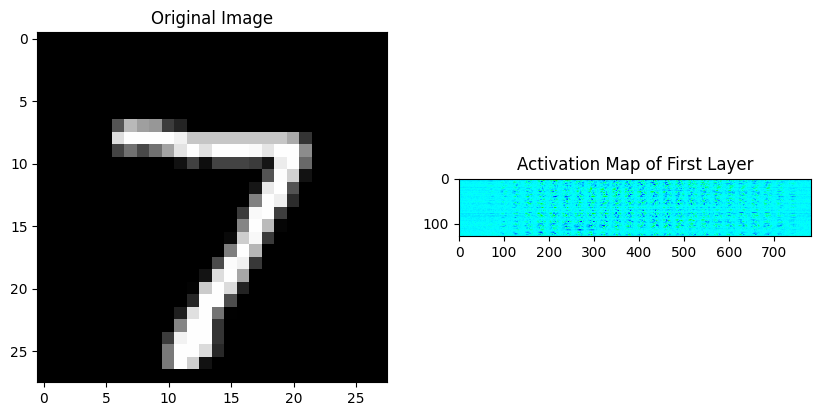

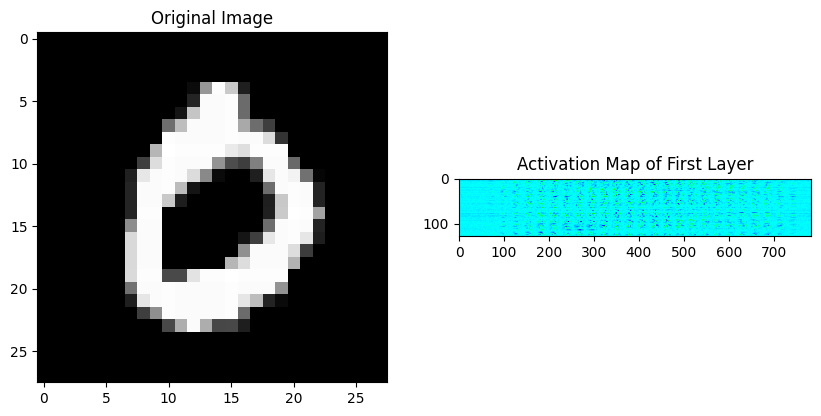

In [58]:
# Get one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Select an image
image = images[0]

# Forward pass through the network
model.eval() # Set the model to evaluation mode
img = image.unsqueeze(0).to(device)
output = model(img)
cmap = 'hsv'


# Plot the original image
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(img.cpu().numpy().squeeze(), cmap='gray')

# Plot the activation of the first layer
plt.subplot(2,2,2)
plt.title("Activation Map of First Layer")
plt.imshow(model.fc1.weight.data.cpu().numpy(), cmap=cmap)

image = images[3] # get visualy very different number
img2 = image.unsqueeze(0).to(device)
output2 = model(img2)

plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
plt.title("Original Image")
plt.imshow(img2.cpu().numpy().squeeze(), cmap='gray')

# Plot the activation of the first layer
plt.subplot(2,2,4)
plt.title("Activation Map of First Layer")
plt.imshow(model.fc1.weight.data.cpu().numpy(), cmap=cmap)

plt.show()

In this example, we plot the original image and the activation map side by side for comparison. The activation map shows how much each neuron in the first layer has been activated by the input image. Bright spots represent higher activation, which means those neurons have recognized patterns in the input image they were designed to detect.

This kind of visualisation can give us insight into what kind of features each layer is learning, and how the network is interpreting the input data.

We can also take a look at activations from convolutional layers - take a look below!

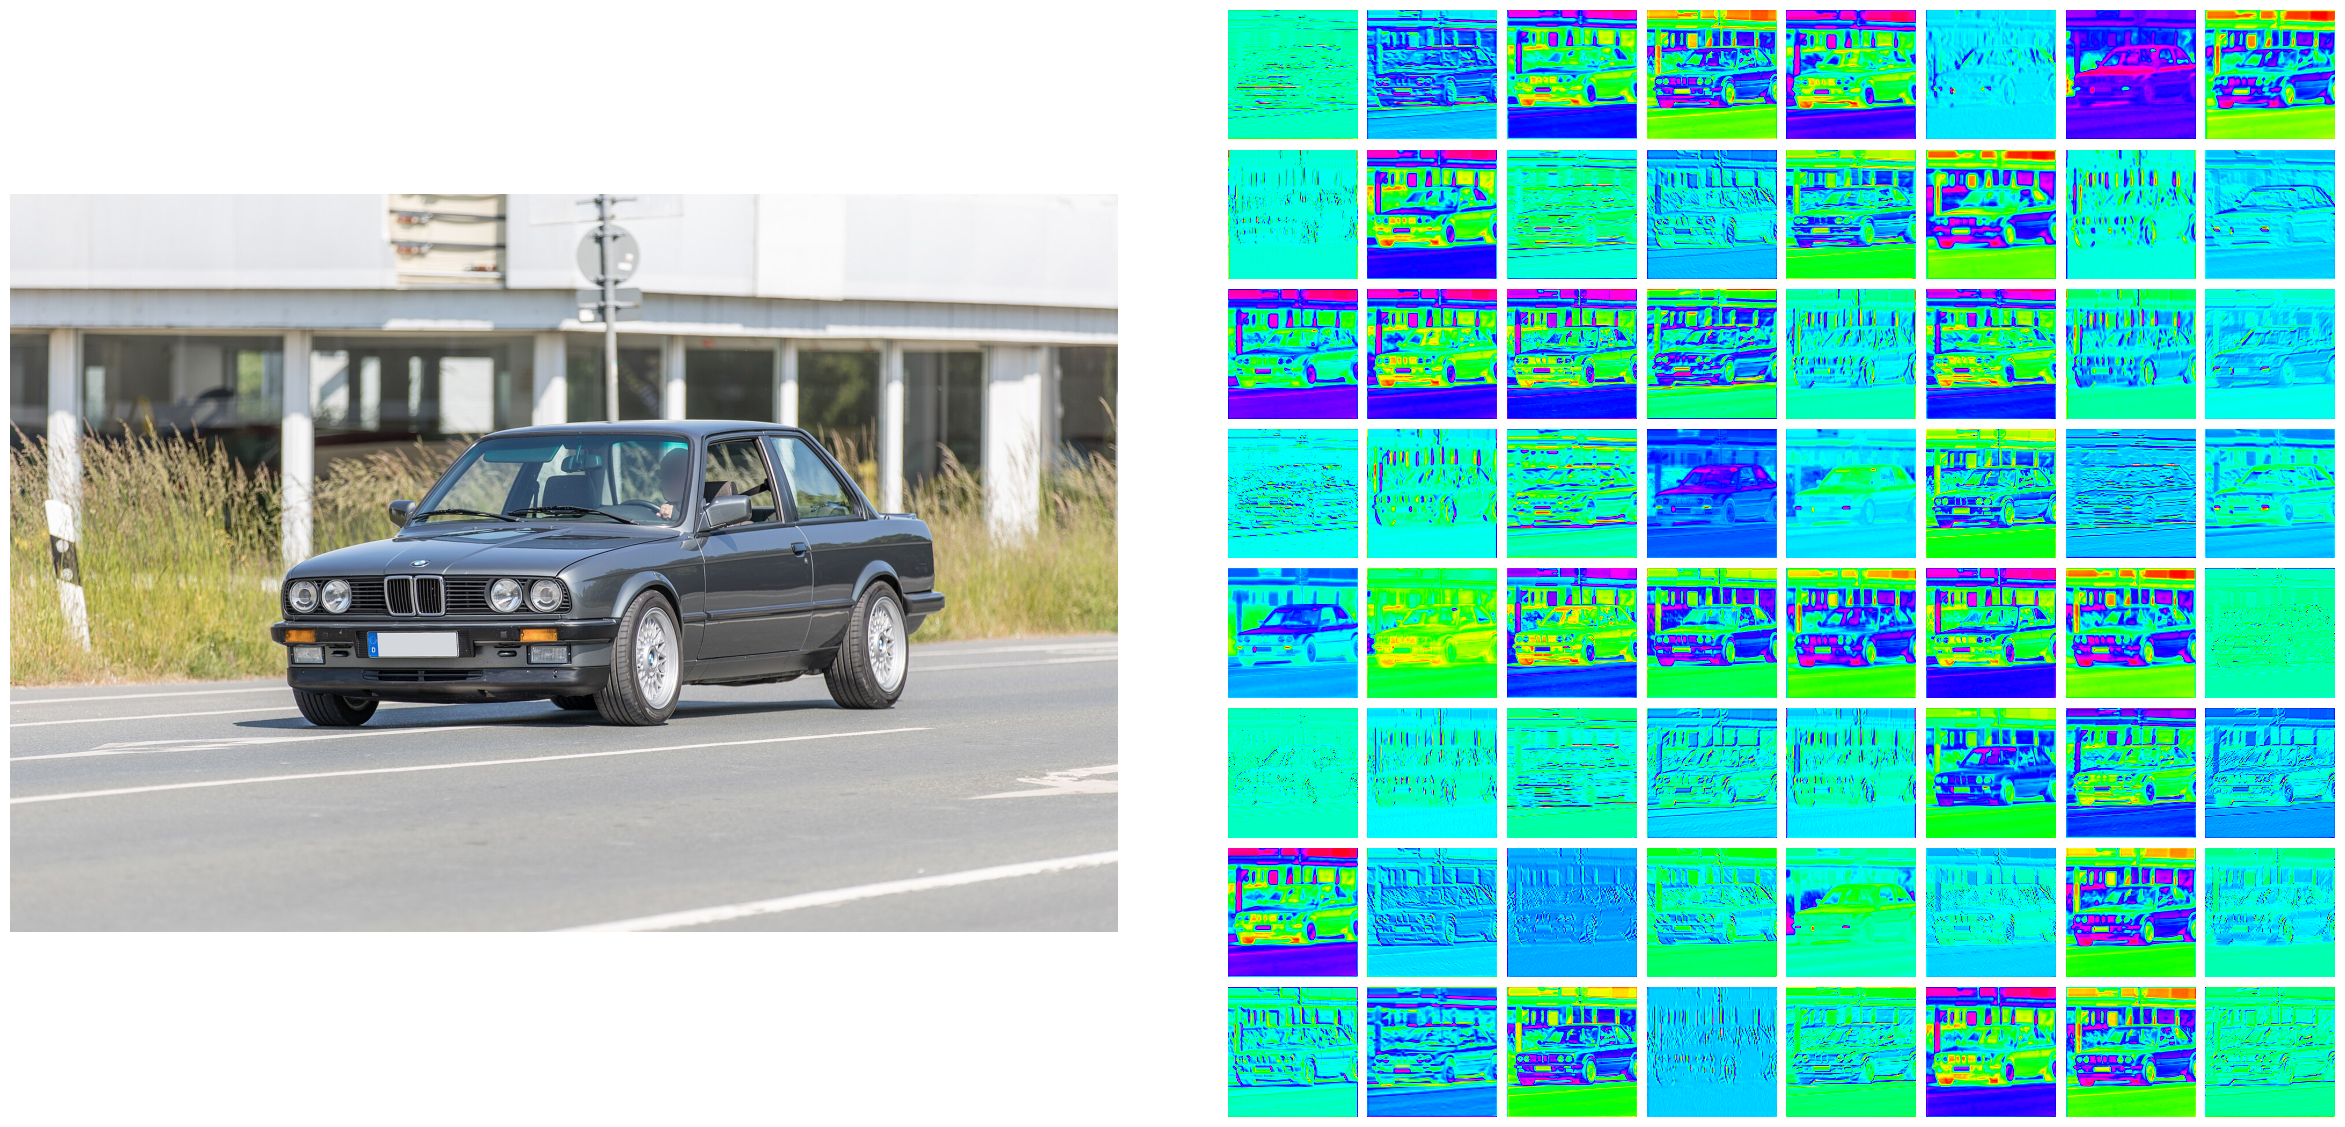

In [111]:
from torchvision.models import resnet18, ResNet18_Weights
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
import requests
from io import BytesIO

# Download a pre-trained ResNet model
cnn_model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
cnn_model.to(device)
cnn_model.eval()

# URL of an image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/BMW_E30_2_%281987%29_JM_2023_06_04.jpg/1920px-BMW_E30_2_%281987%29_JM_2023_06_04.jpg' # Replace with your image URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Define the necessary transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply the transformations to the image
input_img = transform(img).unsqueeze(dim=0).to(device)

# Run the model on the data to get the output of the first convolutional layer
with torch.no_grad():
    activation = cnn_model.conv1(input_img)

# Move the activation back to CPU and convert to numpy
activation = activation.squeeze().cpu().data.numpy()

# Visualize each filter's activation
num_filters = activation.shape[0]

# Create a new figure for the plots
fig = plt.figure(figsize=(30, 30))
#reduce gap between side by side plots
fig.subplots_adjust(wspace=0.1, hspace=0.1)

# Create a grid for the original image
grid_original = ImageGrid(fig, 121,
                          nrows_ncols=(1, 1),  # creates 1x1 grid of axes
                          axes_pad=0,  # pad between axes in inch.
                          )
# Plot the original image in the first grid
grid_original[0].imshow(img)
grid_original[0].axis('off')

# Create a grid for the activations
grid_activations = ImageGrid(fig, 122,
                             nrows_ncols=(8, 8),  # creates 8x8 grid of axes
                             axes_pad=0.1,  # pad between axes in inch.
                             )
for i in range(64):
    # Plot the activation in the second grid
    grid_activations[i].imshow(activation[i, :, :], cmap=cmap)
    grid_activations[i].axis('off')

# Display the plot
plt.show()

Inside a neural network, there's a lot happening. One of the most important things is what happens inside the 'convolution layer'. When we look at a picture, we see how this layer works. The different colors you see are because of something called the 'activation function' - we're using one called 'ReLU' in this example.

This activation function is like a translator, it changes the output of the convolution layer into a new set of values. These new values are what we call 'activations'.

These activations are like hints, they tell us what the filter can spot in the image. The activation in the top-left corner (filter 0) shows the filter can find edges. The one at the bottom-right corner (filter 63) tells us it can find corners.

Why is this important? Because these filters help the model see different things in the image. This is crucial for tasks like finding objects in images or telling what category an image belongs to. 

For example: if you are training a classifier to identify different species of fish, lets say all of your pictures of clownfish are when they are in their anenome. The model could be picking up features from the anenome and using them to classify the fish as a clownfish. This not only reduces the model quality, due to potentially missing clownfish not in their anenome - or misclassifying other fish that are swimming infront of an anenome,  but also reduces the number of filters that are activating on relevant object features.

In the next sections, we will look at how we can monitor and visualise the training process, and how we can visualise high-dimensional feature spaces. Stay tuned!

## 7. Monitoring the Training Process
Monitoring the training process is crucial for understanding the model's performance over time, diagnosing issues, and improving the model's architecture. You typically monitor loss and accuracy, but other metrics could also be relevant, depending on the problem at hand.

Let's modify our training loop from section 5b to store the loss and accuracy at each epoch:

In [38]:
# Placeholders for metrics
train_loss = []
train_accuracy = []

#Put model back into train mode
model.train()

# Training loop
epochs = 10
for epoch in range(epochs):
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):  
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass to get output
        outputs = model(images)
        
        # Calculate Loss
        loss = criterion(outputs, labels)
        
        # Getting predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        
        # Total number of labels
        total += labels.size(0)
        
        # Total correct predictions
        correct += (predicted == labels).sum()
        
        # Clearing the accumulated gradients
        optimizer.zero_grad()
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
    
    train_loss.append(loss.item())
    train_accuracy.append(100 * correct / total)
    
    print(f'Epoch: {epoch+1}, Loss: {loss.item()}, Accuracy: {100 * correct / total}')

Epoch: 1, Loss: 0.025493528693914413, Accuracy: 98.1933364868164
Epoch: 2, Loss: 0.13920335471630096, Accuracy: 98.33333587646484
Epoch: 3, Loss: 0.07777441293001175, Accuracy: 98.49166870117188
Epoch: 4, Loss: 0.02882654033601284, Accuracy: 98.48833465576172
Epoch: 5, Loss: 0.11034196615219116, Accuracy: 98.71499633789062
Epoch: 6, Loss: 0.06975419819355011, Accuracy: 98.74333190917969
Epoch: 7, Loss: 0.01568751595914364, Accuracy: 98.7933349609375
Epoch: 8, Loss: 0.021725483238697052, Accuracy: 98.80999755859375
Epoch: 9, Loss: 0.015089461579918861, Accuracy: 98.96666717529297
Epoch: 10, Loss: 0.030185086652636528, Accuracy: 99.05500030517578


We added a few lines to calculate accuracy and save both loss and accuracy for each epoch. The accuracy is calculated as the number of correct predictions over the total number of predictions.

Now, let's visualise the loss and accuracy over time:

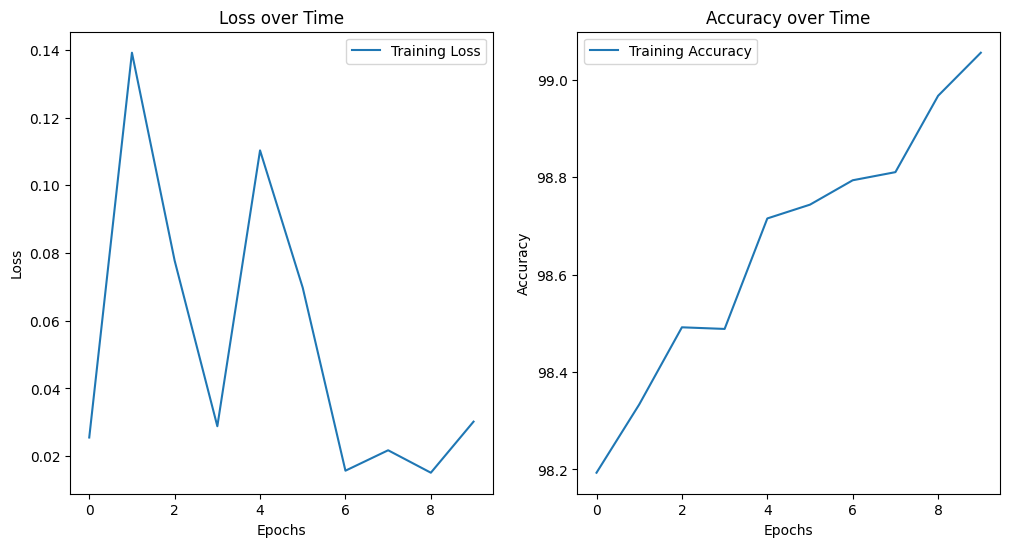

In [39]:
# Plot loss over time
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(train_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Time')
plt.legend()

# Plot accuracy over time
plt.subplot(1,2,2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Time')
plt.legend()

plt.show()

These graphs should show the loss decreasing and the accuracy increasing over time, indicating that the model is learning from the data.

Monitoring the training process is a powerful tool in your machine learning toolkit. It allows you to understand how your model is learning, when it has finished learning or if it is overfitting, and if there is any need for architecture tuning or hyperparameter adjustment. As stated in section 5b, the training, validation, and testing of a model will be covered much more thoroughly in a future blog post.

## 8. visualising High-Dimensional Feature Spaces
Neural networks, especially deep ones, transform input data into a complex, high-dimensional feature space. visualising these feature spaces can be challenging due to their high dimensionality, but it can provide valuable insights into what the network is learning.

One common approach is to use dimensionality reduction techniques like t-SNE or PCA to project the high-dimensional features onto a 2D or 3D space that we can easily visualise.

Let's demonstrate this with our model's output from the second-to-last layer, right before the final classification. We'll take a batch of images, pass them through the network until the second-to-last layer, and then use t-SNE to visualise the resulting features:

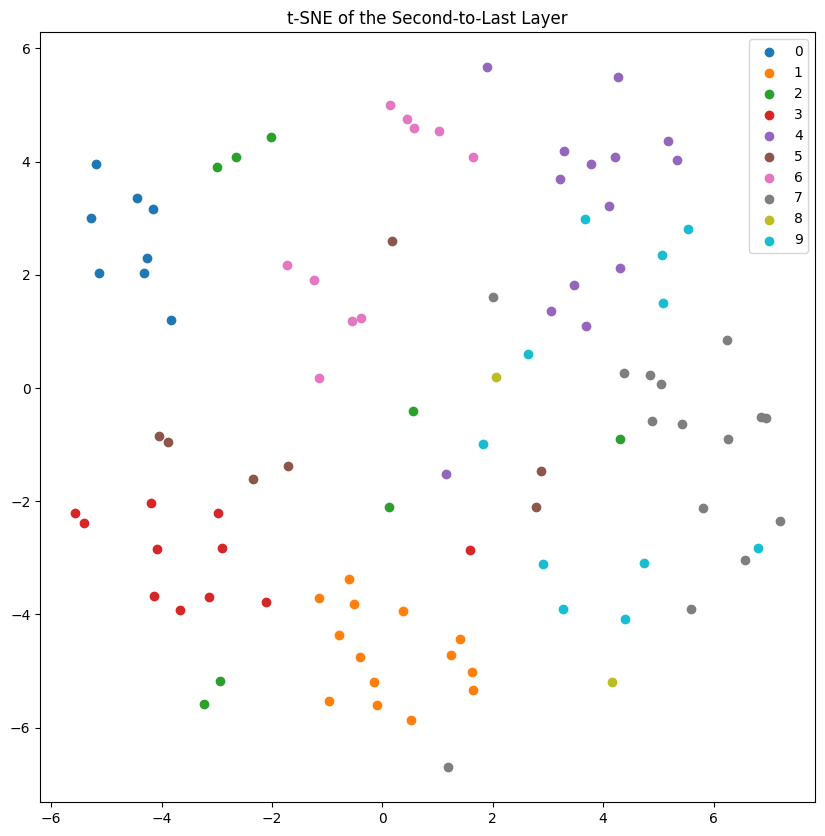

In [41]:
from sklearn.manifold import TSNE

# Get one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Pass the images through the network until the second-to-last layer
model.eval() 
images = images.to(device)
output = model.fc1(images.view(images.shape[0], -1)).detach().cpu().numpy()

# Use t-SNE to reduce dimensionality for visualisation
tsne = TSNE(n_components=2, random_state=0)
output_tsne = tsne.fit_transform(output)

# Plot the result
plt.figure(figsize=(10,10))
for i in range(10):
    indices = labels.numpy() == i
    plt.scatter(output_tsne[indices, 0], output_tsne[indices, 1], label=str(i))
plt.legend()
plt.title('t-SNE of the Second-to-Last Layer')
plt.show()

In this plot, each point represents an image, and the color indicates the image's true class. If the network has learned useful features, then images from the same class should appear closer together in this plot.

This kind of visualisation can help us understand how the network is interpreting the input data, and whether it's learning features that effectively separate the different classes.

Remember, though, that these visualisations are only approximations, and high-dimensional spaces can have properties and structures that don't translate well into 2D or 3D.

## 9. Understanding the Decision Boundary

A decision boundary is a hypersurface that partitions the underlying input space into two or more class regions. For a binary classification problem, the decision boundary separates the space into two regions, one for each class. The decision boundary is where your model is equally likely to classify an input point as one class or the other.

Understanding the decision boundary can provide significant insights into the behavior of your model. In particular, it can show how your model separates different classes and whether it's capturing the relationships in the data correctly.

Let's visualise the decision boundary for a simple binary classification problem solved by our neural network. We'll assume for simplicity that our inputs are 2-dimensional, so we can easily plot them along with the decision boundary.

For larger dimensional data, you would have to select two dimensions to visualise or reduce dimensions using a method like PCA or t-SNE like we did earlier. Below we will use PCA

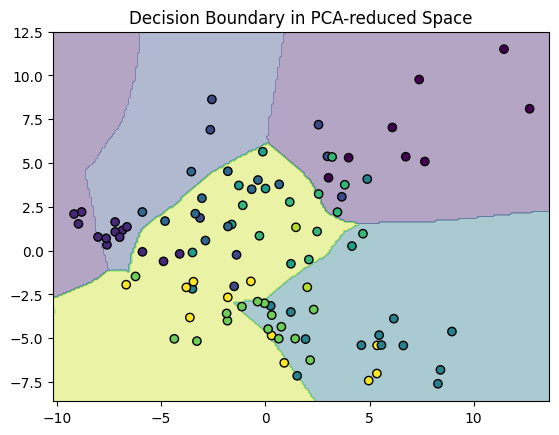

In [46]:
from sklearn.decomposition import PCA

# Get one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Reshape and standardize the images
images_flat = images.view(images.shape[0], -1).cpu().data.numpy()

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(images_flat)

# Create a grid within the range of the reduced data
x_min, x_max = pca_result[:, 0].min() - 1, pca_result[:, 0].max() + 1
y_min, y_max = pca_result[:, 1].min() - 1, pca_result[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Reduce the grid points with PCA and make predictions
model.eval()
grid_points_flat = np.c_[xx.ravel(), yy.ravel()]
grid_points_flat_inverse = pca.inverse_transform(grid_points_flat)
grid_points = torch.tensor(grid_points_flat_inverse, dtype=torch.float).to(device)
outputs = model(grid_points)
_, preds = torch.max(outputs, 1)

# Reshape the predictions to match the grid
preds = preds.cpu().data.numpy().reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, preds, alpha=0.4)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, edgecolors='k')
plt.title('Decision Boundary in PCA-reduced Space')
plt.show()

In this script, we first get a batch of test images, flatten and standardize them, and then reduce the dimensionality to 2D using PCA. We then create a grid within the range of the reduced data, reduce the grid points using the same PCA transform, and make predictions using our model. Finally, we plot the decision boundary along with the reduced data points.

Remember that this plot is only an approximation. The actual decision boundary in the full 784-dimensional space may be more complex. This visualisation is just a way to get an idea of how your model separates the classes in a reduced space.

## 10. Conclusions and Next Steps
In this notebook, we have explored some techniques for visualising and understanding the internals of a neural network using PyTorch. We've seen how to visualise the weights and biases, the activation maps, monitor the training process, and even project high-dimensional feature spaces into 2D for visualisation.

From these visualisations, we can gain valuable insights into our model's behavior, which can guide us in improving its performance.

Here are some key takeaways:

**Weights and biases** give us an understanding of how our model transforms inputs, with their visualisations showing us the patterns that neurons have learned.

**Activation maps** help us understand what features are activating the neurons in a given layer, and how the network is interpreting the input data.

**Monitoring the training process** can help us spot issues like overfitting and underfitting, understand when the model has finished learning, and guide us in tuning the architecture or hyperparameters.

**Visualising high-dimensional feature spaces** provides insights into how the network is distinguishing between different classes, and whether it's learning features that effectively separate the different classes.

Remember, these visualisations are just tools to help us better understand and interpret our models, and they're not always perfect or complete. They should be used in combination with good machine learning practices, like proper data preprocessing, model evaluation, and error analysis.

In the future, you may want to explore other visualisation techniques as well, such as saliency maps, Grad-CAM, or even newer methods that continue to be developed in this active research area.

Also, different types of networks (like Convolutional Neural Networks or Recurrent Neural Networks) may have their own unique visualisation techniques.

Exploring these different methods can give you an even deeper understanding of your models and help you become an even more effective machine learning practitioner.